In [20]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv(r'C:\Users\berid\OneDrive\Desktop\mydata\Analysis\Online_Retail.csv',encoding='latin')

In [23]:
# Adding date columns

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month_name()
df['MonthNum']=df['InvoiceDate'].dt.month
df['WeekDay']=df['InvoiceDate'].dt.day_name()
df['Hour']=df['InvoiceDate'].dt.hour
df['MonthYear']=df['InvoiceDate'].dt.to_period('m')
df['Date']=df['InvoiceDate'].dt.date

In [24]:
df['Value']=df['Quantity']*df['UnitPrice']

In [25]:
df['CustomerID']=df['CustomerID'].apply(pd.to_numeric).astype('Int64').astype(str)

In [26]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,MonthNum,WeekDay,Hour,MonthYear,Date,Value
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France,2011,September,9,Monday,12,2011-09,2011-09-12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France,2011,September,9,Monday,12,2011-09,2011-09-12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France,2011,September,9,Monday,12,2011-09,2011-09-12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France,2011,September,9,Monday,12,2011-09,2011-09-12,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680,France,2011,September,9,Monday,12,2011-09,2011-09-12,14.85


### orders by country and period

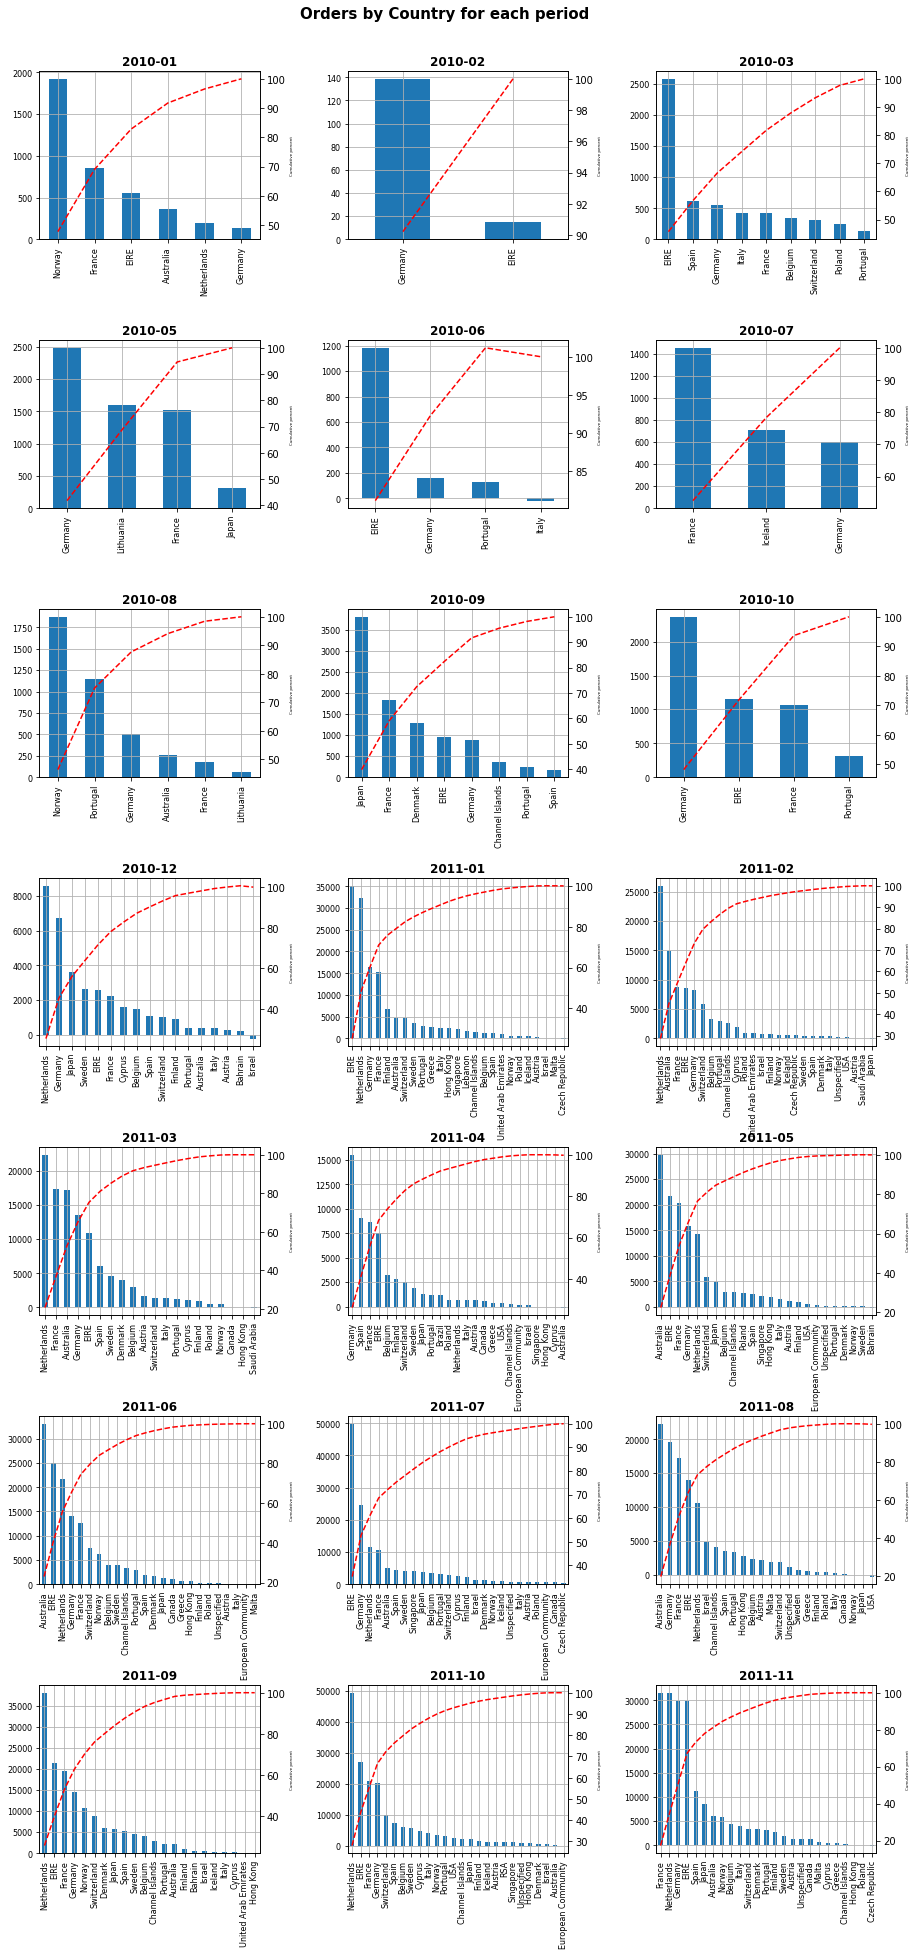

In [27]:
grouped=df.groupby(['MonthYear','Country'])['Value'].sum().reset_index().sort_values(['MonthYear','Value'],ascending=[True,False])
periods=sorted(grouped['MonthYear'].unique())
fig,axes=plt.subplots(7,3,figsize=(15,30))
for ax, period in zip(axes.ravel(),periods):
    filtered=grouped.query('MonthYear==@period and Country!="United Kingdom"')
    filtered['Cumulative']=(filtered['Value']/filtered['Value'].sum()*100).cumsum()
    filtered.plot(ax=ax,kind='bar',x='Country',y='Value',fontsize=8,xlabel='',legend=False)
    ax.set_title(period,fontweight='bold')
    ax.grid()
    
    ax2=ax.twinx()
    ax2.plot(filtered['Country'],filtered['Cumulative'],color='r',ls='--')
    ax2.set_ylabel('Cumulative percent',size=4)

plt.suptitle('Orders by Country for each period',size=15,fontweight='bold')
plt.subplots_adjust(hspace=0.6,wspace=0.4,top=0.95)
plt.show()

### How order values were changing for each country overtime 

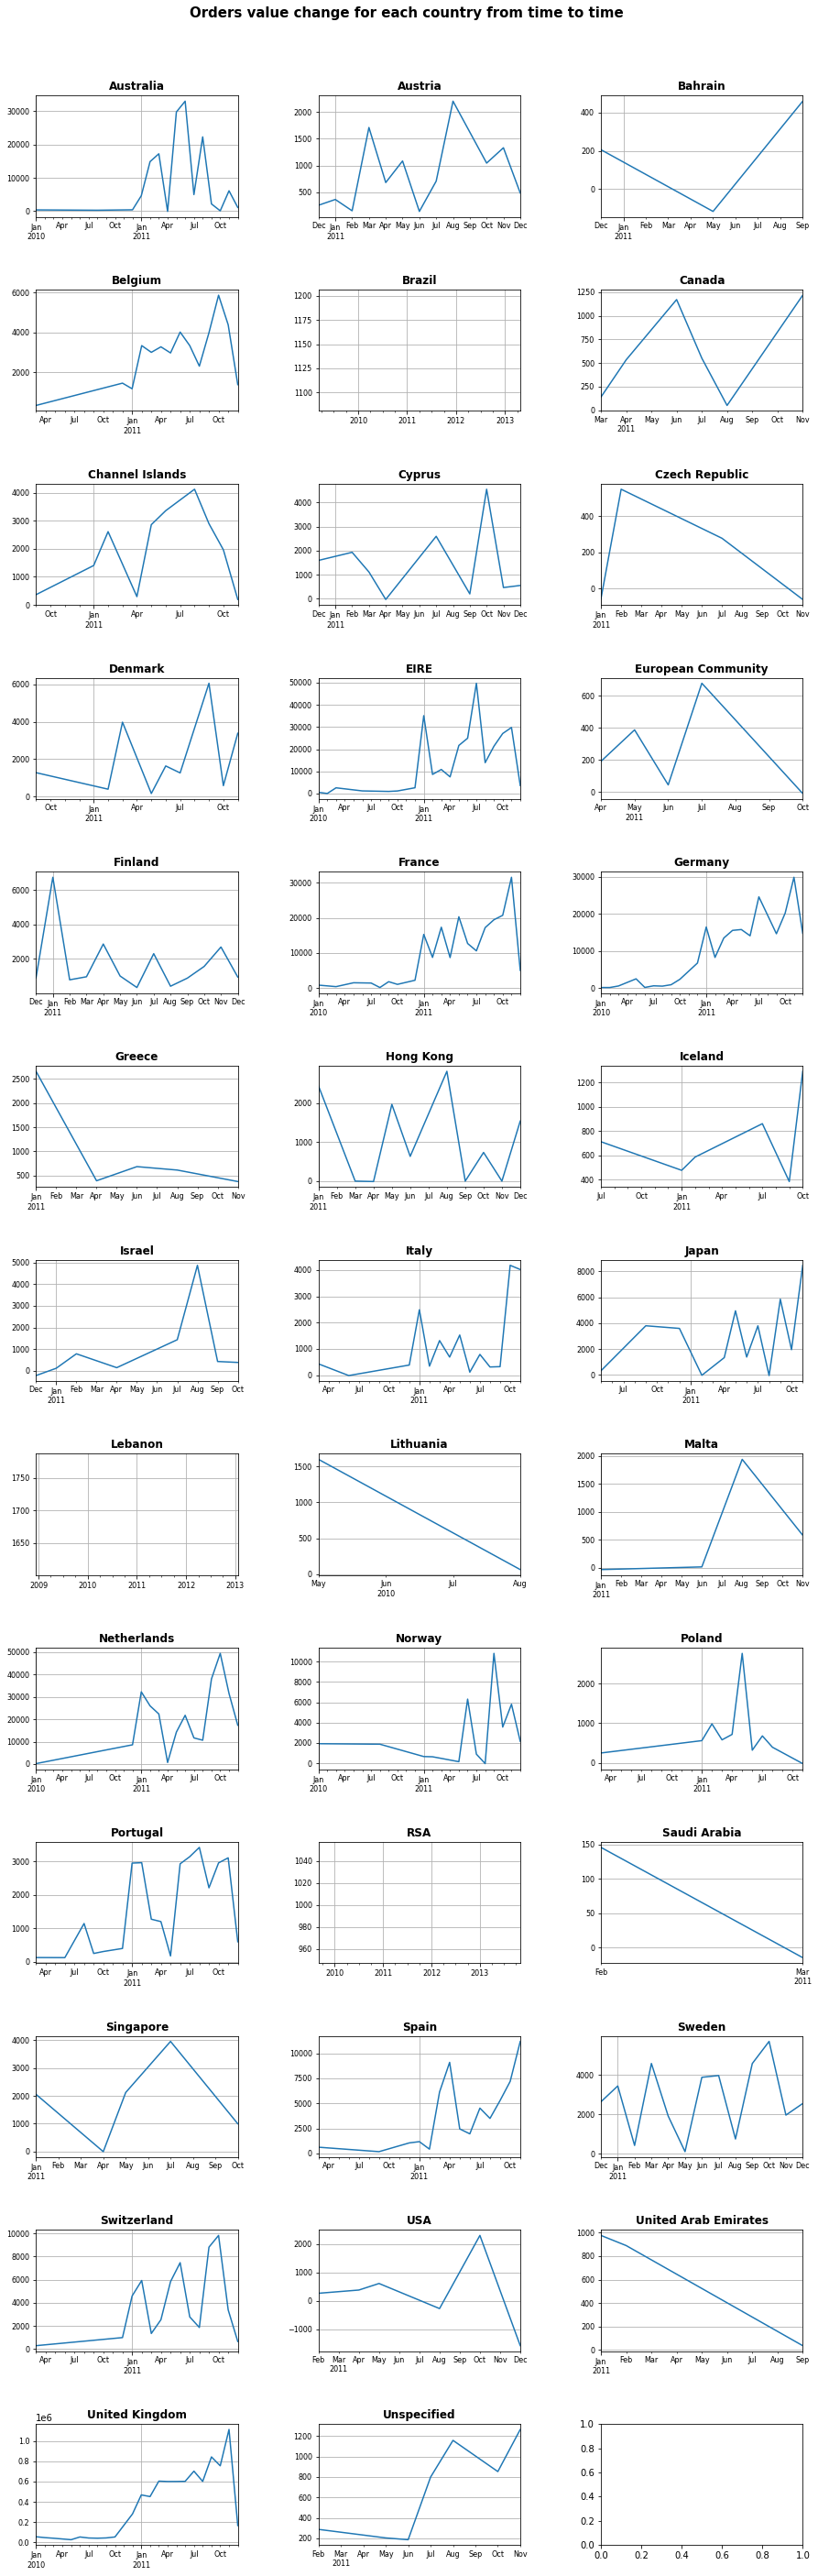

In [28]:
grouped=df.groupby(['MonthYear','Country'])['Value'].sum().reset_index().sort_values(['MonthYear','Value'],ascending=[True,False])
countries=sorted(grouped['Country'].unique())
fig,axes=plt.subplots(13,3,figsize=(15,45))
for ax, country in zip(axes.ravel(),countries):
    filtered=grouped.query('Country==@country')
    filtered.plot(ax=ax,kind='line',x='MonthYear',y='Value',fontsize=8,xlabel='',legend=False)
    ax.set_title(country,fontweight='bold')
    ax.grid()
plt.suptitle('Orders value change for each country from time to time',size=15,fontweight='bold')
plt.subplots_adjust(hspace=0.6,wspace=0.4,top=0.95)
plt.show()

### Most frequently ordered product per country and period 

In [29]:
for c in sorted(df['Country'].unique()):
    for p in sorted(df.query('Country==@c')['MonthYear'].unique()):
        print(c,p,df[(df['Country']==c)&(df['MonthYear']==str(p))]['Description'].value_counts().reset_index().iloc[0,0])

Australia 2010-01 CHRISTMAS LIGHTS 10 REINDEER
Australia 2010-08 20 DOLLY PEGS RETROSPOT
Australia 2010-12 DOORMAT UNION FLAG
Australia 2011-01 JAM MAKING SET WITH JARS
Australia 2011-02 MEMO BOARD COTTAGE DESIGN
Australia 2011-03 HOMEMADE JAM SCENTED CANDLES
Australia 2011-04 JIGSAW TOADSTOOLS 3 PIECE
Australia 2011-05 RED TOADSTOOL LED NIGHT LIGHT
Australia 2011-06 PAPER BUNTING RETROSPOT
Australia 2011-07 HANGING HEART JAR T-LIGHT HOLDER
Australia 2011-08 SET OF 4 PANTRY JELLY MOULDS
Australia 2011-09 WHITE HEART CONFETTI IN TUBE
Australia 2011-10 CHILDS GARDEN FORK PINK
Australia 2011-11 RABBIT NIGHT LIGHT
Australia 2011-12 SET OF 5 LUCKY CAT MAGNETS 
Austria 2010-12 ANGEL DECORATION STARS ON DRESS
Austria 2011-01 JUMBO BAG OWLS
Austria 2011-02 BROCADE RING PURSE 
Austria 2011-03 RETROSPOT TEA SET CERAMIC 11 PC 
Austria 2011-04 PACK OF 60 PINK PAISLEY CAKE CASES
Austria 2011-05 SET/6 RED SPOTTY PAPER PLATES
Austria 2011-06 PARTY BUNTING
Austria 2011-07 PLASTERS IN TIN VINTAGE PAISL

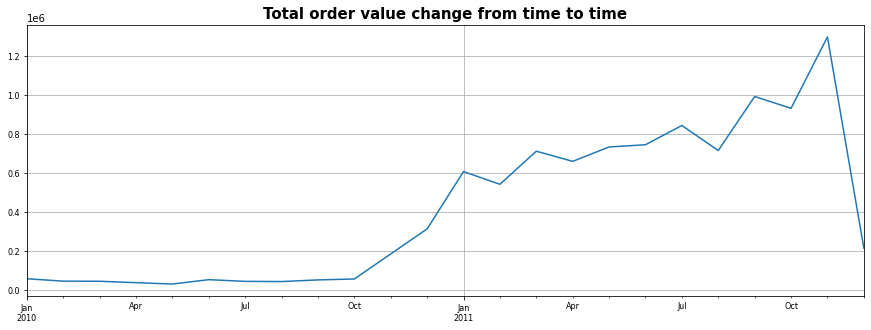

In [30]:
grouped=df.groupby('MonthYear')['Value'].sum().reset_index().sort_values('MonthYear')

grouped.plot(kind='line',x='MonthYear',y='Value',figsize=(15,5),xlabel='',legend=False,fontsize=8)
plt.title('Total order value change from time to time',size=15,fontweight='bold')
plt.grid(axis='both')
plt.show()

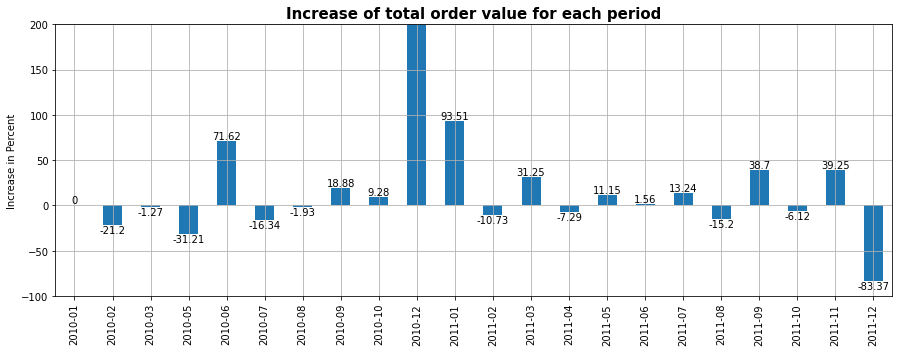

In [31]:
grouped['PrevMonth']=grouped['Value'].shift(1)
grouped['Increase']=((grouped['Value']-grouped['PrevMonth'])/grouped['PrevMonth']*100).round(2)

ax=grouped.plot(kind='bar',x='MonthYear',y='Increase',xlabel='',legend=False,fontsize=10,figsize=(15,5))
plt.ylim(-100,200)
plt.bar_label(ax.containers[0],label_type='edge')
plt.ylabel('Increase in Percent')
plt.grid('both')
plt.title('Increase of total order value for each period',size=15,fontweight='bold')
plt.show()

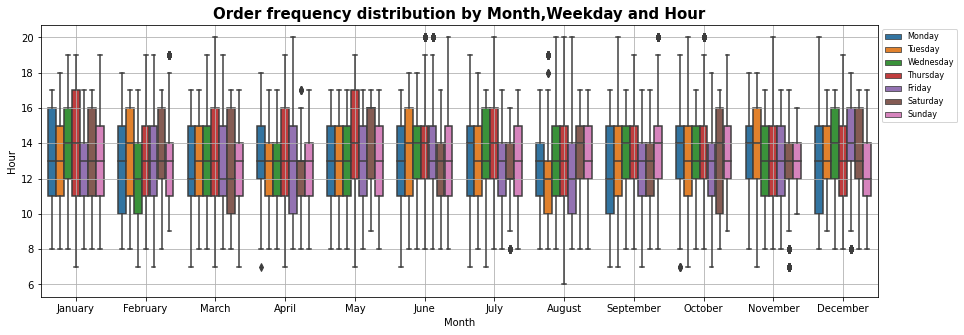

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df.assign(new=df['InvoiceDate'].dt.weekday).sort_values(['new','MonthNum']),
            x='Month',y='Hour',hue='WeekDay')
plt.legend(bbox_to_anchor=(1,1),fontsize=8)
plt.title('Order frequency distribution by Month,Weekday and Hour',size=15,fontweight='bold')
plt.grid()
plt.show()